## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = mouse_metadata.merge(study_results,on = 'Mouse ID')
# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(f"Number of mice in the whole dataset: {len(data['Mouse ID'].unique())}.")

Number of mice in the whole dataset: 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = data[data.duplicated(subset=['Mouse ID','Timepoint'])].iloc[0,0]
print(f'The duplicate mouse ID is: {duplicate_mouse}.')

The duplicate mouse ID is: g989.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data[data.duplicated(subset=['Mouse ID','Timepoint'],keep = False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean = data[data['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of mice in the clean data: {len(data_clean['Mouse ID'].unique())}.")

Number of mice in the clean data: 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_dict = {'mean':mean,'median':median,'variance':variance,'stadard_deviation':standard_deviation,'SEM':SEM}
summary_table = pd.DataFrame(summary_dict)
summary_table

,mean,median,variance,stadard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
data_clean.groupby('Drug Regimen').agg(mean = ('Tumor Volume (mm3)','mean'),
                                                     median = ('Tumor Volume (mm3)','median'),
                                                     variance = ('Tumor Volume (mm3)','var'),
                                                     standard_deviation = ('Tumor Volume (mm3)','std'),
                                                     SEM = ('Tumor Volume (mm3)','sem'))

,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

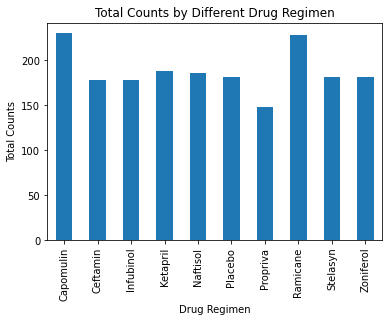

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Drug_Regimen_count = data_clean.groupby('Drug Regimen')['Timepoint'].count()
Drug_Regimen_data = pd.DataFrame(Drug_Regimen_count)
#display(Drug_Regimen_data)
Drug_Regimen_data.plot(kind = 'bar',legend=False)
plt.ylabel('Total Counts')
plt.title('Total Counts by Different Drug Regimen')
plt.show()

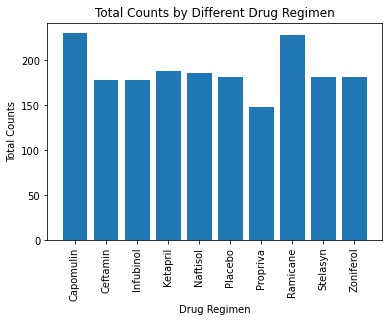

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(Drug_Regimen_data.index,Drug_Regimen_data['Timepoint'])
plt.xticks(rotation = 90)
plt.ylabel('Total Counts')
plt.xlabel('Drug Regimen')
plt.title('Total Counts by Different Drug Regimen')
plt.show()

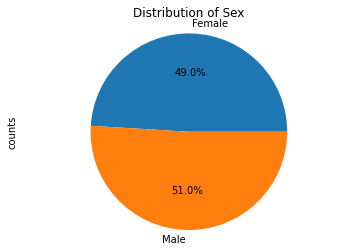

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = data_clean.groupby('Sex').agg(counts = ('Sex','count'))
sex_data.plot.pie(y='counts',autopct = '%1.1f%%',legend=False)
plt.title('Distribution of Sex')
plt.axis('equal')
plt.show()

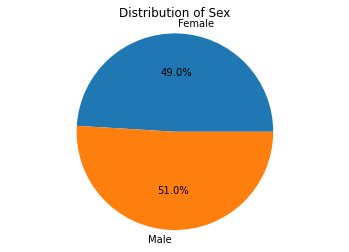

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_data['counts'], labels=sex_data.index,autopct = '%1.1f%%')
plt.title('Distribution of Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
end_point_data = data_clean.drop_duplicates(subset = ['Mouse ID','Drug Regimen'],keep = 'last')
selected_regimen_end_point_data = end_point_data[end_point_data['Drug Regimen'].isin(regimen_list)]
selected_regimen_end_point_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {'Capomulin':[], 'Ramicane':[], 'Infubinol':[], 'Ceftamin':[]}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
sample_n = len(selected_regimen_end_point_data)
for regimen in regimen_list:
    for i in range(sample_n):
    # Locate the rows which contain mice on each drug and get the tumor volumes
        if selected_regimen_end_point_data.iloc[i,1] == regimen:   
    # add subset 
            tumor_vol_data[regimen].append(selected_regimen_end_point_data.iloc[i,6])    
    # Determine outliers using upper and lower bounds
    IQR = sts.iqr(tumor_vol_data[regimen], interpolation = 'midpoint')
    Q3, Q1 = np.percentile(tumor_vol_data[regimen], [75 ,25])
    tumor_vol_outliers = []
    for i in range(len(tumor_vol_data[regimen])):
        if tumor_vol_data[regimen][i] > (Q3 + 1.5* IQR) or tumor_vol_data[regimen][i] < (Q1 - 1.5* IQR):
            tumor_vol_outliers.append(tumor_vol_data[regimen][i])
    if len(tumor_vol_outliers) == 0:
        print(f'There is no outlier for {regimen} treated groups.')
    else:
        print(f'Outliers for {regimen} treated groups: {tumor_vol_outliers}.')

tumor_vol_df = pd.DataFrame(tumor_vol_data)

There is no outlier for Capomulin treated groups.
There is no outlier for Ramicane treated groups.
Outliers for Infubinol treated groups: [36.3213458].
There is no outlier for Ceftamin treated groups.


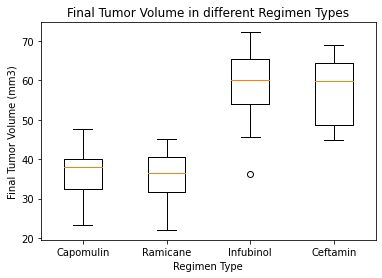

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_df)
plt.xlabel('Regimen Type')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume in different Regimen Types')
plt.xticks([1, 2, 3, 4], tumor_vol_df.columns)
plt.show()

## Line and Scatter Plots

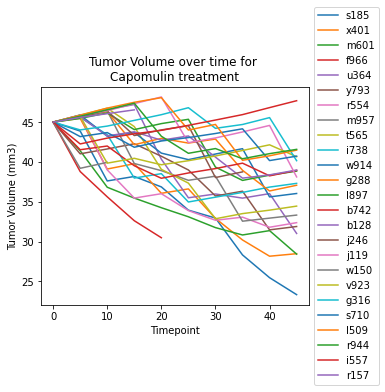

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data_capomulin = data_clean[data_clean['Drug Regimen'] == 'Capomulin']
fig,ax = plt.subplots()
for id in data_capomulin['Mouse ID'].unique():
    ax.plot(data_capomulin[data_capomulin['Mouse ID'] == id]['Timepoint'],
             data_capomulin[data_capomulin['Mouse ID'] == id]['Tumor Volume (mm3)'],label = id)
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Volume over time for \nCapomulin treatment")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

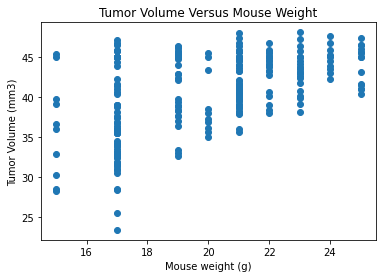

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(data_capomulin['Weight (g)'],data_capomulin['Tumor Volume (mm3)'])
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Versus Mouse Weight")
plt.show()

## Correlation and Regression

The correlation between Mouse weight and Tumor volume is 0.53
The r-squared is: 0.28


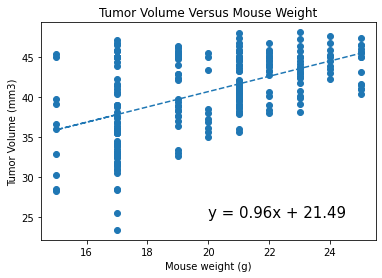

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = data_capomulin['Weight (g)']
y_values = data_capomulin['Tumor Volume (mm3)']
correlation = sts.pearsonr(x_values,y_values)
print(f"The correlation between Mouse weight and Tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"--")
plt.annotate(line_eq,(20,25),fontsize=15,color="black")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Versus Mouse Weight")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.show()


### Observations and conclusions
* There are two drugs that are promising based on the end timepoint tumor volume: Capomulin and Ramicane.
* For instance, Capomulin treated mice have an overall trend of decreased tumor volume over time.
* There is a positive correlation between mouse weight and tumor volume.